# Table of Contents
* [1.Khai báo thư viện](#head1)
* [2. Đọc dữ liệu](#head2)
* [3. Tổng quan dữ liệu](#head3)
* [4. Tiền xử lý dữ liệu](#head4)
* [5. Trực quan hoá dữ liệu](#head5)
    * [5.1. Thông tin tổng quan về khủng bố](#head5_1)
    * [5.2. Thông tin về khủng bố trên thế giới](#head5_2)
    * [5.3. Thông tin về khủng bố theo khu vực](#head5_3)
    * [5.4. Thông tin về khủng bố theo quốc gia](#head5_4)
    * [5.5. Thông tin về các nhóm khủng bố](#head5_5)

# 1. Khai báo thư viện <a id="head1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches

# 2. Đọc dữ liệu <a id="head2"></a>

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
data.head()

C:\Users\Quoc Trung\anaconda3\envs\PQT\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# 3.Tổng quan dữ liệu <a id="head3"></a>

In [3]:
data.shape

(181691, 135)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

**Nhận xét**
- Dữ liệu chưa thông tin về các cuộc khủng bố từ năm 1970 đến năm 2017
- Dữ liệu có 181691 dòng và 135 cột bao gồm các giá trị về thời gian, địa điểm, số lượng thương vong, cách thức tấn công,...
- 77 cột có giá trị là định lượng và 58 cột có giá trị là định tính

## Lọc cột chuẩn bị dữ liệu

**Mô tả một số cột**
- iyear: Năm xảy ra sự cố
- imonth: Tháng xảy ra sự cố
- iday: Ngày xảy ra sự cố
- country_txt: Tên nước xảy ra sự cố
- region_txt: Khu vực xảy ra sự cố
- city: Thành phố xảy ra sự cố
- latitude, longitude: Vĩ độ và kinh độ
- summary: Tóm tắt về vụ tấn công
- attacktype1_txt: Phương pháp tấn công
- targtype1_txt: Loại mục tiêu/nạn nhân chung
- target1: Mục tiêu cụ thể bị tấn công
- gname: Tên nhóm khủng bố thực hiện vụ tấn công
- nkill: Tổng số người tử vong
- nwound: Tổng số người bị thương
- weaptype1_txt: Loại vũ khí được sử dụng
- motive: Động cơ gây ra vụ tấn công

In [7]:
data['Thương vong'] = data['nkill'] + data['nwound']
data.rename(columns={'iyear':'Năm','imonth':'Tháng','iday':'Ngày','country_txt':'Quốc gia','region_txt':'Khu vực', 'motive':'Động cơ',
                     'city':'Thành phố','attacktype1_txt':'Kiểu tấn công','target1':'Mục tiêu','targtype1_txt':'Mục tiêu chung',
                     'nkill':'Tử vong','nwound':'Bị thương','gname':'Nhóm khủng bố','weaptype1_txt':'Loại vũ khí','longitude':'Kinh độ','latitude':'Vĩ độ'},
            inplace=True)
data = data[['Năm','Tháng','Ngày','Quốc gia','Khu vực','Thành phố','Kiểu tấn công', 'Mục tiêu','Mục tiêu chung',
                       'Tử vong','Bị thương','Thương vong','Nhóm khủng bố', 'Loại vũ khí','Kinh độ','Vĩ độ', 'Động cơ']]
data.head()

,Năm,Tháng,Ngày,Quốc gia,Khu vực,Thành phố,Kiểu tấn công,Mục tiêu,Mục tiêu chung,Tử vong,Bị thương,Thương vong,Nhóm khủng bố,Loại vũ khí,Kinh độ,Vĩ độ,Động cơ
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,Private Citizens & Property,1.0,0.0,1.0,MANO-D,Unknown,-69.951164,18.456792,NaN
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),0.0,0.0,0.0,23rd of September Communist League,Unknown,-99.086624,19.371887,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Employee,Journalists & Media,1.0,0.0,1.0,Unknown,Unknown,120.599741,15.478598,NaN
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),NaN,NaN,NaN,Unknown,Explosives,23.762728,37.997490,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),NaN,NaN,NaN,Unknown,Incendiary,130.396361,33.580412,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Năm             181691 non-null  int64  
 1   Tháng           181691 non-null  int64  
 2   Ngày            181691 non-null  int64  
 3   Quốc gia        181691 non-null  object 
 4   Khu vực         181691 non-null  object 
 5   Thành phố       181257 non-null  object 
 6   Kiểu tấn công   181691 non-null  object 
 7   Mục tiêu        181055 non-null  object 
 8   Mục tiêu chung  181691 non-null  object 
 9   Tử vong         171378 non-null  float64
 10  Bị thương       165380 non-null  float64
 11  Thương vong     164817 non-null  float64
 12  Nhóm khủng bố   181691 non-null  object 
 13  Loại vũ khí     181691 non-null  object 
 14  Kinh độ         177134 non-null  float64
 15  Vĩ độ           177135 non-null  float64
 16  Động cơ         50561 non-null   object 
dtypes: float64

In [9]:
data.describe()

,Năm,Tháng,Ngày,Tử vong,Bị thương,Thương vong,Kinh độ,Vĩ độ
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,164817.000000,1.771340e+05,177135.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668,5.296128,-4.586957e+02,23.498343
std,13.259430,3.388303,8.814045,11.545741,35.949392,42.069023,2.047790e+05,18.569242
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.618590e+07,-53.154613
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,4.545640e+00,11.510046
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000,4.324651e+01,31.467463
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000,6.871033e+01,34.685087
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000,1.793667e+02,74.633553


# 4. Tiền xử lý dữ liệu <a id="head4"></a>

## 4.1. Kiểm tra dữ liệu bị thiếu

In [10]:
data.isnull().sum()

Năm                    0
Tháng                  0
Ngày                   0
Quốc gia               0
Khu vực                0
Thành phố            434
Kiểu tấn công          0
Mục tiêu             636
Mục tiêu chung         0
Tử vong            10313
Bị thương          16311
Thương vong        16874
Nhóm khủng bố          0
Loại vũ khí            0
Kinh độ             4557
Vĩ độ               4556
Động cơ           131130
dtype: int64

- Có 5 cột bị missing value
- 3 cột Tử vong, Bị thương, Thương vong thiếu khá nhiều dữ liệu

Với các dữ liệu bị thiếu ở cột Tử vong và Bị thương, ta có thể thay thế bằng 0.

In [11]:
data['Tử vong'].fillna(0, inplace=True)
data['Bị thương'].fillna(0, inplace=True)
data['Thương vong'] = data['Tử vong'] + data['Bị thương']

**Kiểm tra lại giá trị thiếu**

In [12]:
data.isnull().sum()

Năm                    0
Tháng                  0
Ngày                   0
Quốc gia               0
Khu vực                0
Thành phố            434
Kiểu tấn công          0
Mục tiêu             636
Mục tiêu chung         0
Tử vong                0
Bị thương              0
Thương vong            0
Nhóm khủng bố          0
Loại vũ khí            0
Kinh độ             4557
Vĩ độ               4556
Động cơ           131130
dtype: int64

## 4.2. Kiểm tra dữ liệu lặp

In [13]:
data_dup = data[data.duplicated(keep=False)]
data_dup.head()

,Năm,Tháng,Ngày,Quốc gia,Khu vực,Thành phố,Kiểu tấn công,Mục tiêu,Mục tiêu chung,Tử vong,Bị thương,Thương vong,Nhóm khủng bố,Loại vũ khí,Kinh độ,Vĩ độ,Động cơ
67,1970,2,16,United States,North America,Berkeley,Bombing/Explosion,department store,Business,0.0,0.0,0.0,Unknown,Explosives,-122.280022,37.874043,NaN
68,1970,2,16,United States,North America,Berkeley,Bombing/Explosion,department store,Business,0.0,0.0,0.0,Unknown,Explosives,-122.280022,37.874043,NaN
87,1970,2,23,United States,North America,South Sioux City,Bombing/Explosion,Power Transmission Pole in the Dakota City/Sio...,Utilities,0.0,0.0,0.0,Strikers,Explosives,-96.413949,42.470310,The attack occurred during the violent Iowa Be...
88,1970,2,23,United States,North America,South Sioux City,Bombing/Explosion,Power Transmission Pole in the Dakota City/Sio...,Utilities,0.0,0.0,0.0,Strikers,Explosives,-96.413949,42.470310,The attack occurred during the violent Iowa Be...
89,1970,2,23,United States,North America,South Sioux City,Bombing/Explosion,Power Transmission Pole in the Dakota City/Sio...,Utilities,0.0,0.0,0.0,Strikers,Explosives,-96.413949,42.470310,The attack occurred during the violent Iowa Be...


In [14]:
len(data_dup)

14645

### Loại bỏ dữ liệu lặp

In [15]:
data.drop_duplicates(keep='first',inplace=True)

In [16]:
data[data.duplicated(keep=False)]

,Năm,Tháng,Ngày,Quốc gia,Khu vực,Thành phố,Kiểu tấn công,Mục tiêu,Mục tiêu chung,Tử vong,Bị thương,Thương vong,Nhóm khủng bố,Loại vũ khí,Kinh độ,Vĩ độ,Động cơ


In [17]:
data.shape

(171004, 17)

- Sau khi loại bỏ dữ liệu bị lặp thì dữ liệu còn 170637 dòng

# 5. Trực quan hoá dữ liệu <a id="head5"></a>

## 5.1. Một số thông tin tổng quan <a id="head5_1"></a>

In [18]:
print(f'''Đất nước có số vụ tấn công khủng bố nhiều nhất: {data['Quốc gia'].value_counts().index[0]}''')
print(f'''Khu vực có số vụ tấn công khủng bố nhiều nhất: {data['Khu vực'].value_counts().index[0]}''')

Đất nước có số vụ tấn công khủng bố nhiều nhất: Iraq
Khu vực có số vụ tấn công khủng bố nhiều nhất: Middle East & North Africa


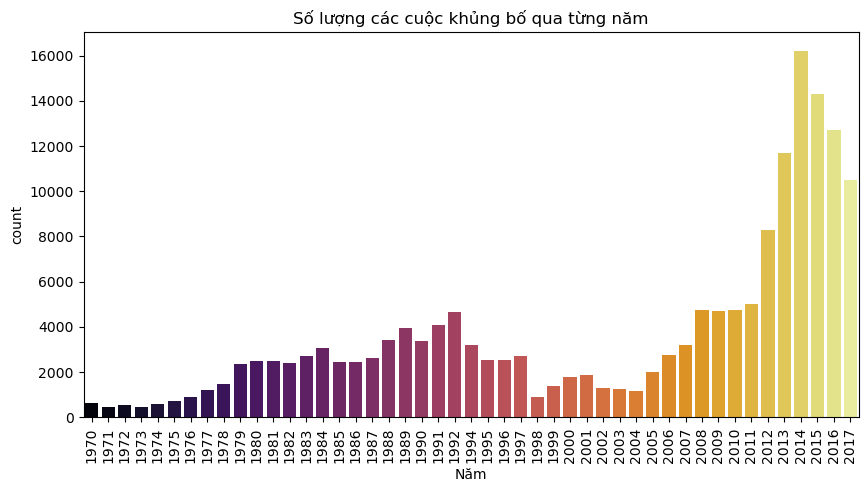

In [19]:
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x='Năm', palette='inferno')
plt.title('Số lượng các cuộc khủng bố qua từng năm')
plt.xticks(rotation=90)

plt.show()

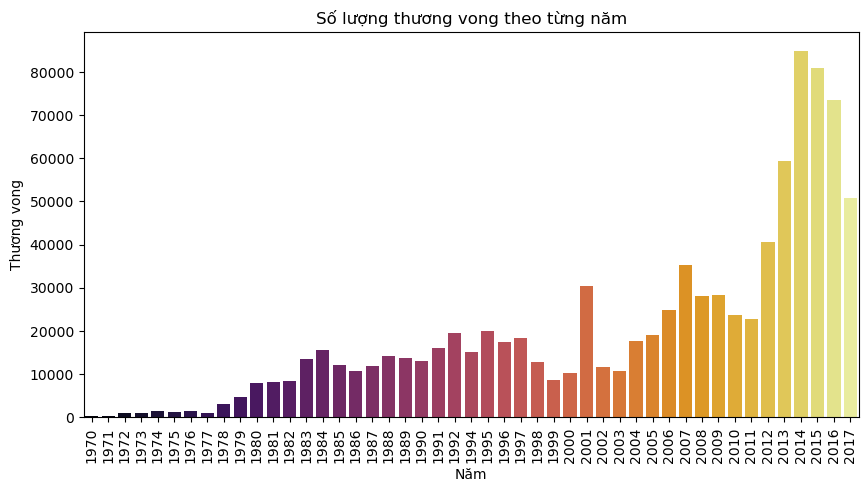

In [20]:
plt.figure(figsize=(10,5))

data_casualty_year = data.groupby('Năm')['Thương vong'].sum().reset_index()
sns.barplot(data=data_casualty_year, x='Năm', y='Thương vong',palette='inferno')

plt.title('Số lượng thương vong theo từng năm')
plt.xticks(rotation=90)

plt.show()

## 5.2. Thông tin về khủng bố trên thế giới <a id="head5_2"></a>

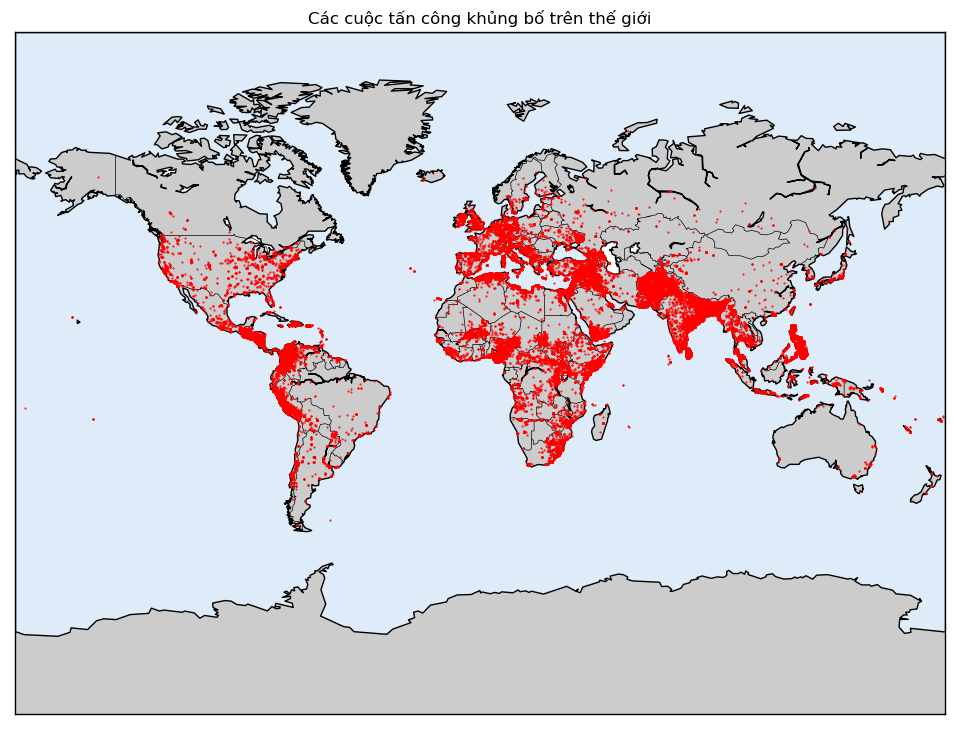

In [21]:
plt.figure(figsize=(12, 9))

# Loại bỏ các toạ độ bị thiếu
data_loc = data.copy()
data_loc.dropna(subset=['Kinh độ','Vĩ độ'],inplace=True)

# Vẽ bản đồ thế giới
terr_map = Basemap(projection='mill')
terr_map.drawcoastlines()
terr_map.drawcountries()
terr_map.fillcontinents()
terr_map.drawmapboundary(fill_color='#deecfa')

# Lấy danh sách toạ độ các vụ tấn công
long_100 = list(data_loc['Kinh độ'])
lat_100 = list(data_loc['Vĩ độ'])
x_100,y_100 = terr_map(long_100,lat_100)
terr_map.plot(x_100, y_100, marker='o', color='red',linestyle='none', markersize=0.5)

# Lấy danh sách toạ độ các vụ tấn công có thương vong < 100
# long_ = list(data_loc[data_loc['Thương vong']<100]['Kinh độ'])
# lat_ = list(data_loc[data_loc['Thương vong']<100]['Vĩ độ'])
# x_,y_ = terr_map(long_,lat_)
# terr_map.plot(x_, y_,marker='o', color='#544b4b',linestyle='none', markersize=0.5)

plt.title('Các cuộc tấn công khủng bố trên thế giới')
# #plt.legend(loc='lower center',handles=[mpatches.Patch(color='red', label = "Thương vong >= 100"),
#                                       mpatches.Patch(color='#544b4b',label='Thương vong < 100')])
plt.show()

## 5.3. Thông tin về khủng bố theo khu vực <a id="head5_3"></a>

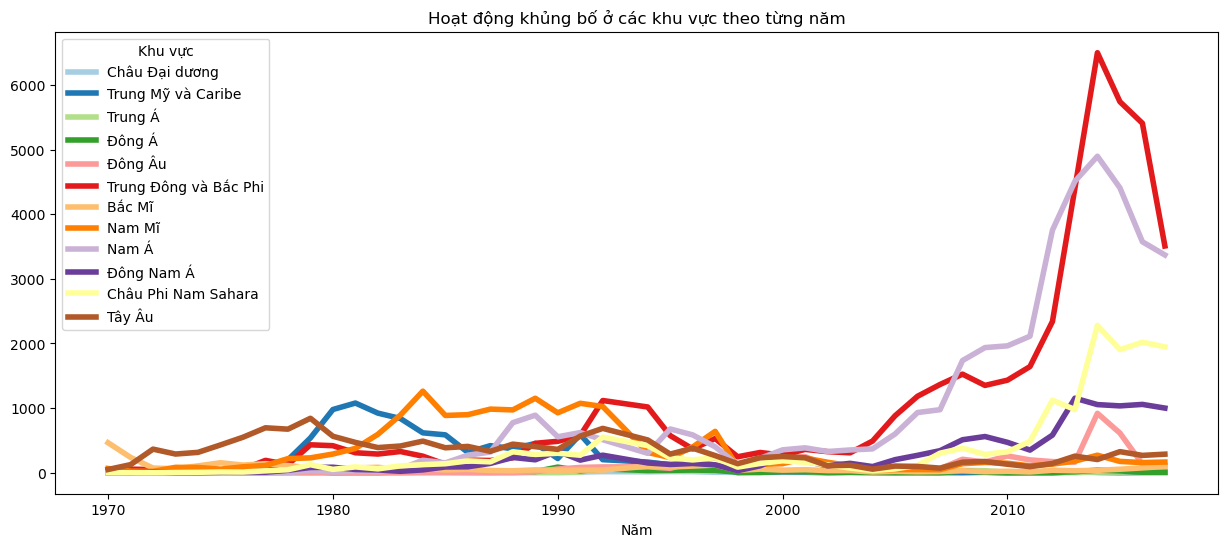

In [22]:
data_region = pd.crosstab(data['Năm'], data['Khu vực'])
data_region.rename(columns={'Australasia & Oceania':'Châu Đại dương', 'Central America & Caribbean':'Trung Mỹ và Caribe', 
                            'Central Asia':'Trung Á','East Asia':'Đông Á', 'Eastern Europe':'Đông Âu', 
                            'Middle East & North Africa':'Trung Đông và Bắc Phi','North America':'Bắc Mĩ', 
                            'South America':'Nam Mĩ', 'South Asia':'Nam Á', 'Southeast Asia':'Đông Nam Á',
                            'Sub-Saharan Africa':'Châu Phi Nam Sahara', 'Western Europe': 'Tây Âu'}, inplace=True)
data_region.plot(kind='line', linewidth=4, color=sns.color_palette('Paired'))
plt.gcf().set_size_inches(15,6)
plt.title('Hoạt động khủng bố ở các khu vực theo từng năm')
plt.show()

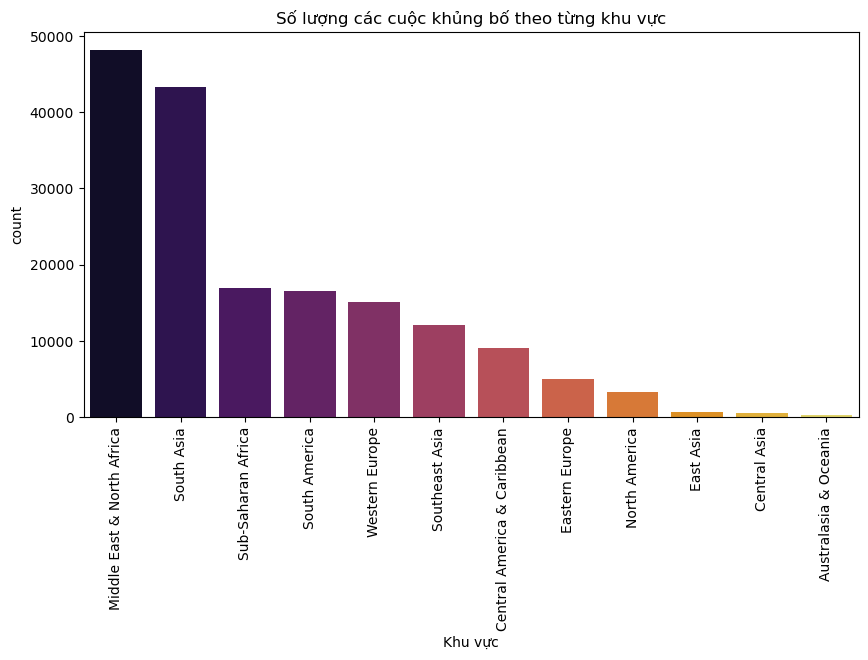

In [23]:
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x='Khu vực', order=data['Khu vực'].value_counts().index, palette='inferno')
plt.title('Số lượng các cuộc khủng bố theo từng khu vực')
plt.xticks(rotation=90)

plt.show()

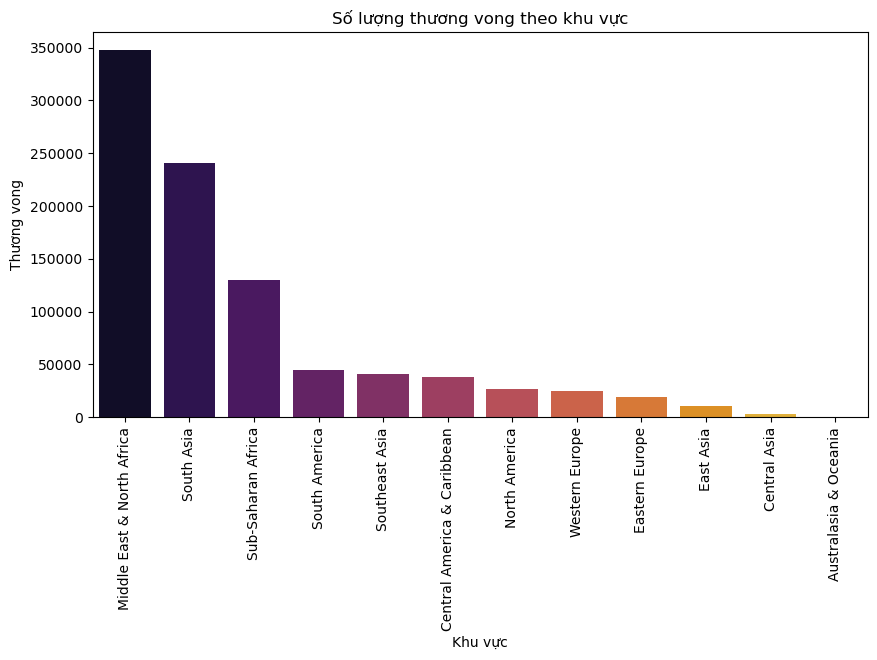

In [24]:
plt.figure(figsize=(10,5))

data_casualty_reg = data.groupby('Khu vực')['Thương vong'].sum().reset_index()
sns.barplot(data=data_casualty_reg, x='Khu vực',y='Thương vong', palette='inferno',
           order=data_casualty_reg.sort_values(by='Thương vong',ascending=False)['Khu vực'])
plt.xticks(rotation=90)
plt.title('Số lượng thương vong theo khu vực')

plt.show()

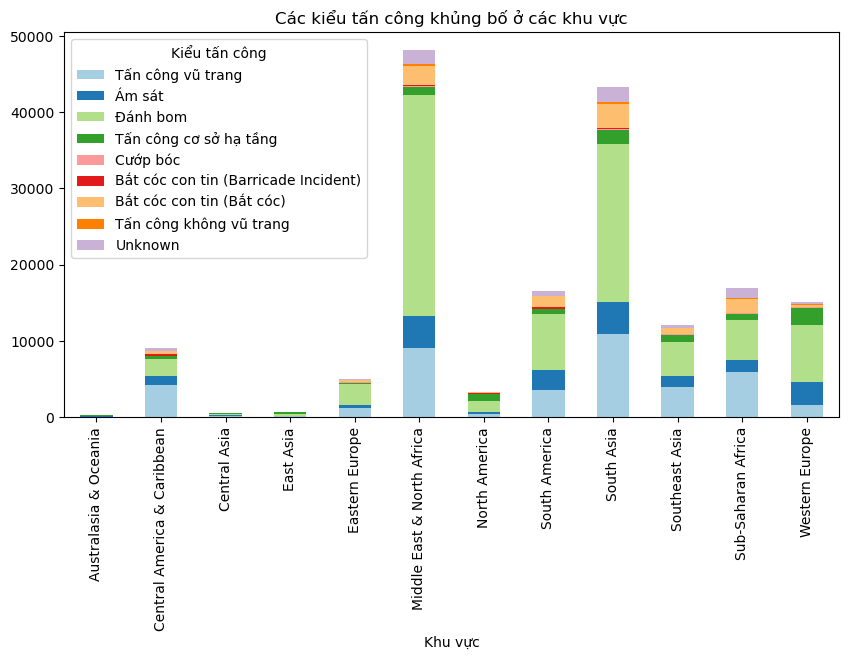

In [25]:
data_attacktype = pd.crosstab(data['Khu vực'],data['Kiểu tấn công'])
data_attacktype.rename(columns={'Armed Assault':'Tấn công vũ trang', 'Assassination':'Ám sát', 'Bombing/Explosion':'Đánh bom',
                       'Facility/Infrastructure Attack':'Tấn công cơ sở hạ tầng', 'Hijacking':'Cướp bóc',
                       'Hostage Taking (Barricade Incident)':'Bắt cóc con tin (Barricade Incident)', 
                        'Hostage Taking (Kidnapping)':'Bắt cóc con tin (Bắt cóc)', 
                        'Unarmed Assault':'Tấn công không vũ trang'}, inplace=True)
data_attacktype.plot(kind='bar', stacked=True, width=0.5, color=sns.color_palette('Paired'))
plt.gcf().set_size_inches(10,5)
plt.title('Các kiểu tấn công khủng bố ở các khu vực')
plt.show()

## 5.4. Thông tin về khủng bố theo quốc gia <a id="head5_4"></a>

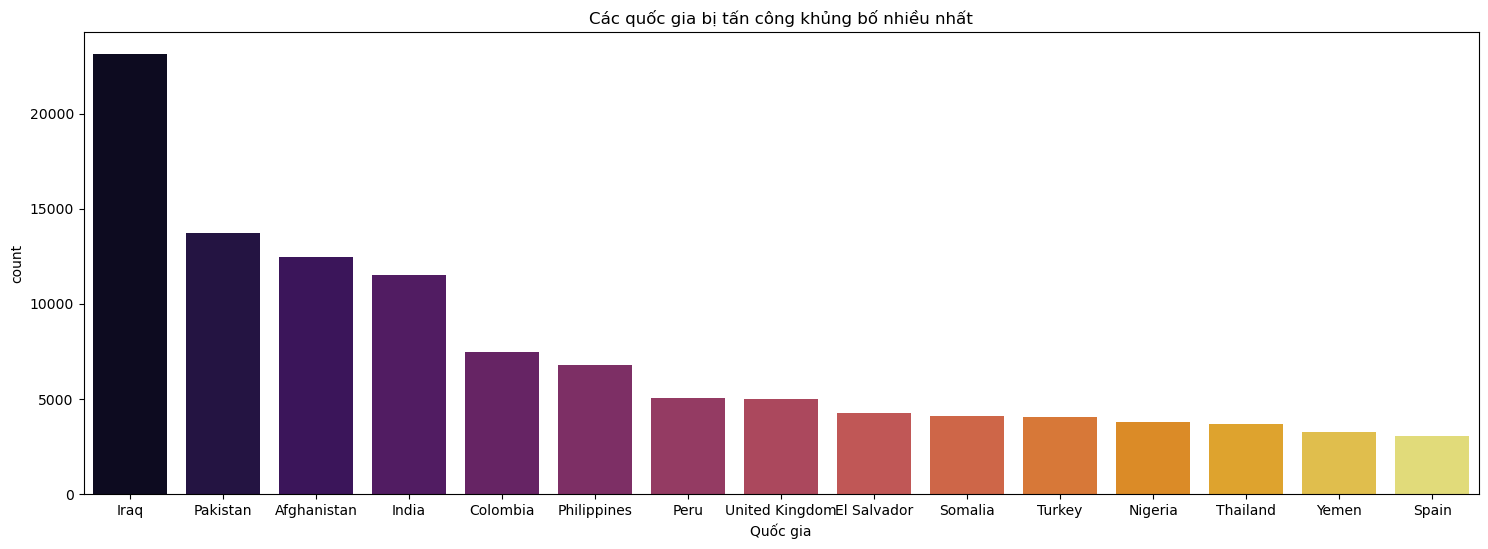

In [26]:
plt.figure(figsize=(18,6))

sns.countplot(data=data, x='Quốc gia', order=data['Quốc gia'].value_counts()[:15].index,palette='inferno')
plt.title('Các quốc gia bị tấn công khủng bố nhiều nhất')
plt.show()

## 5.5. Các cách thức tấn công khủng bố <a id="head5_5"></a>

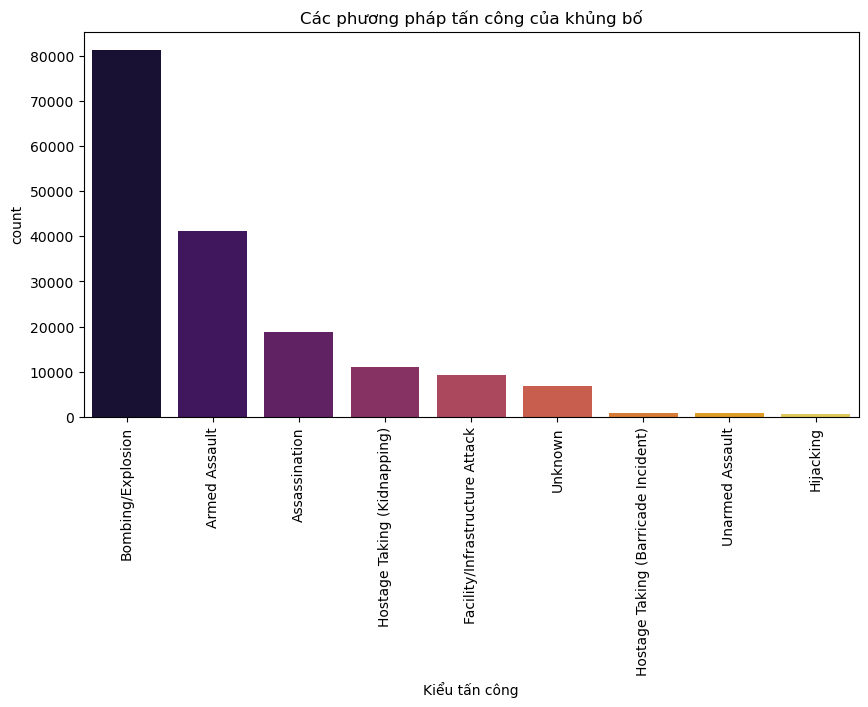

In [27]:
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x='Kiểu tấn công', order=data['Kiểu tấn công'].value_counts().index, palette='inferno')
plt.title('Các phương pháp tấn công của khủng bố')
plt.xticks(rotation=90)

plt.show()

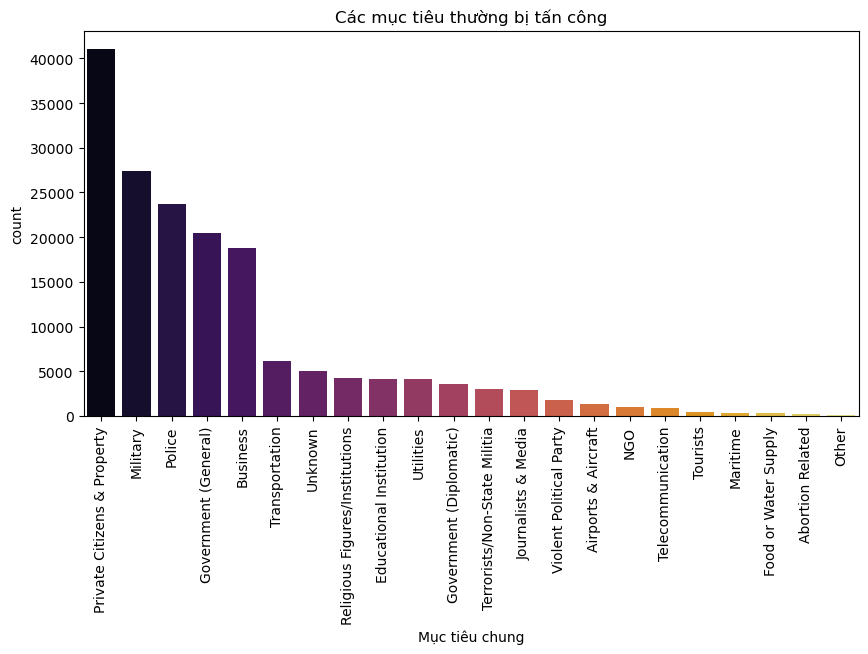

In [28]:
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x='Mục tiêu chung', order=data['Mục tiêu chung'].value_counts().index, palette='inferno')
plt.title('Các mục tiêu thường bị tấn công')
plt.xticks(rotation=90)

plt.show()

## 5.6. Thông tin về các nhóm khủng bố <a id="head5_6"></a>

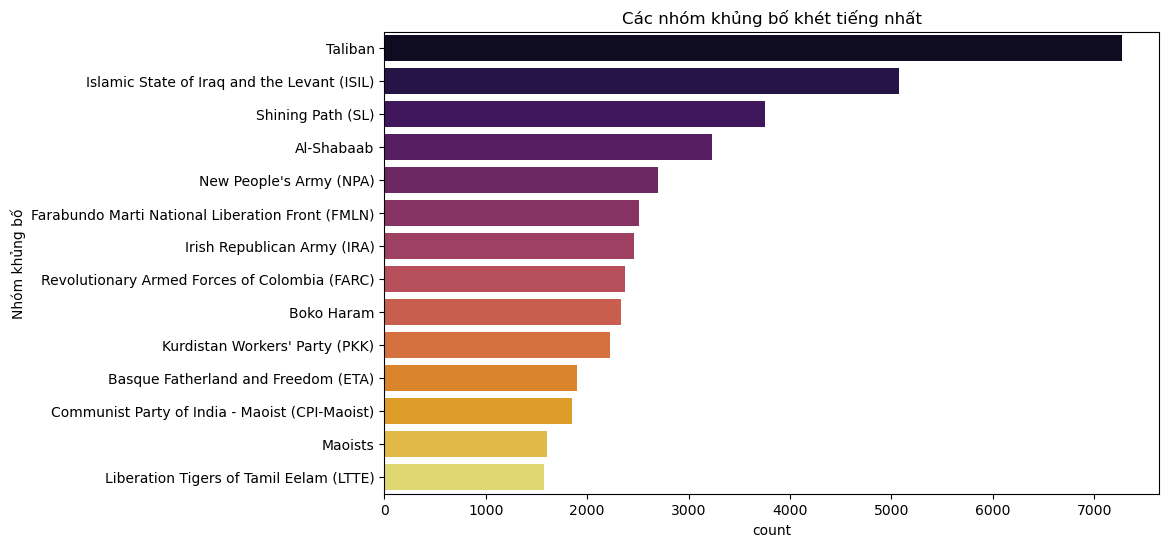

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='Nhóm khủng bố', order=data['Nhóm khủng bố'].value_counts()[1:15].index,palette='inferno')
plt.title('Các nhóm khủng bố khét tiếng nhất')
plt.show()

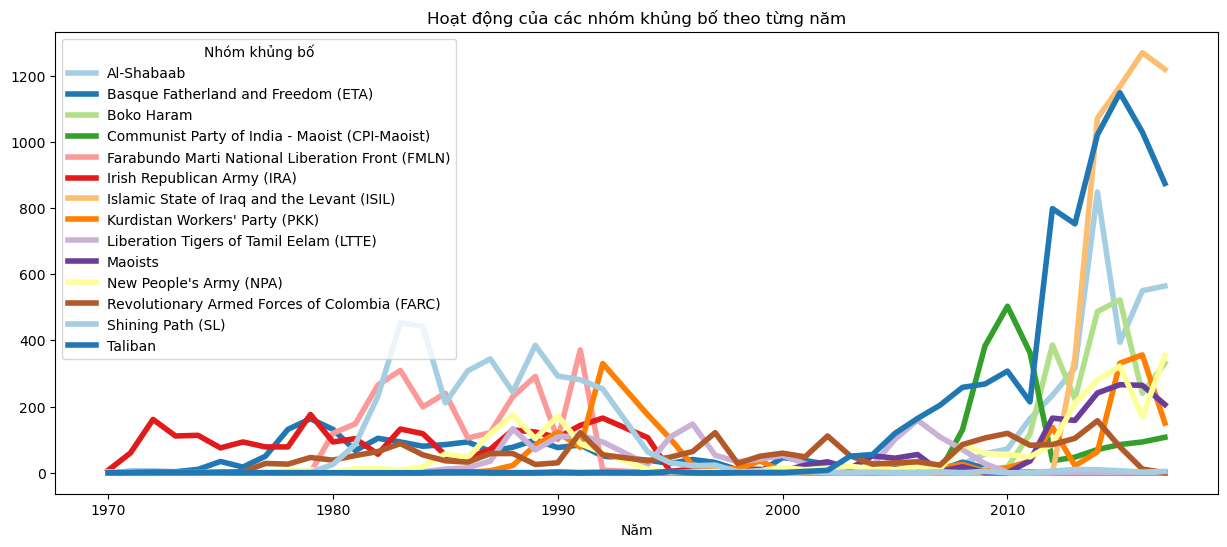

In [30]:
top_gr = data[data['Nhóm khủng bố'].isin(data['Nhóm khủng bố'].value_counts()[1:15].index)]
pd.crosstab(top_gr['Năm'], top_gr['Nhóm khủng bố']).plot(kind='line', linewidth=4,color=sns.color_palette('Paired'))
plt.gcf().set_size_inches(15,6)
plt.title('Hoạt động của các nhóm khủng bố theo từng năm')
plt.show()

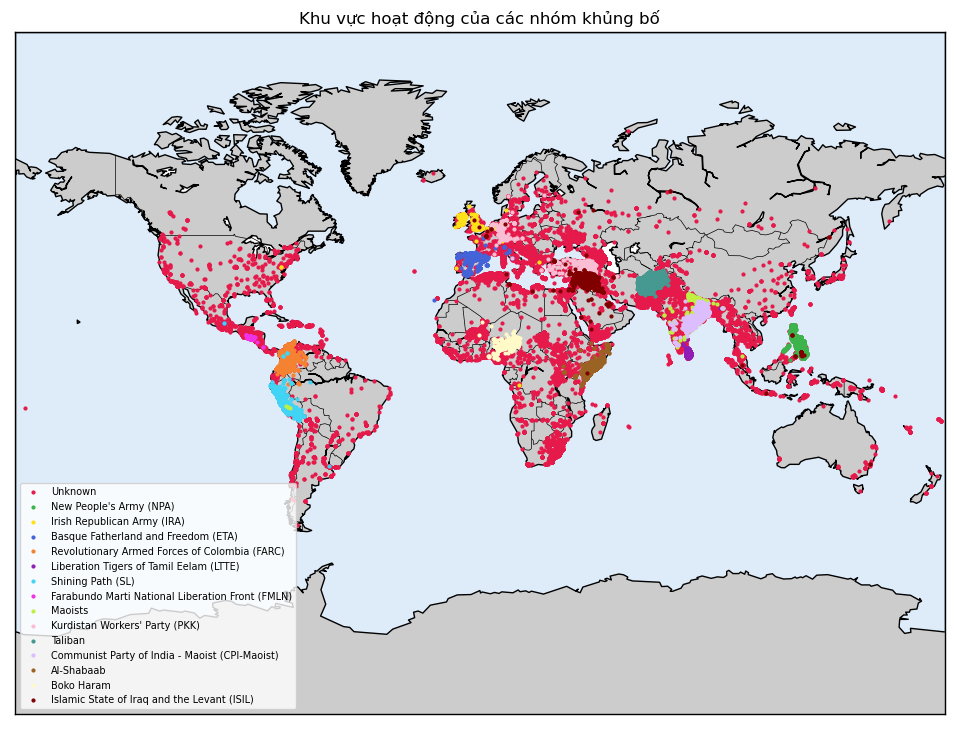

In [31]:
plt.figure(figsize=(12, 9))

top_gr = data[data['Nhóm khủng bố'].isin(data['Nhóm khủng bố'].value_counts()[:15].index)]

top_gr_map = Basemap(projection='mill')
top_gr_map.drawcoastlines()
top_gr_map.drawcountries()
top_gr_map.fillcontinents()
top_gr_map.drawmapboundary(fill_color='#deecfa')

colors=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', 
        '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000']
groups = list(top_gr['Nhóm khủng bố'].unique())
def draw_point(gr, clr):
    long_gr = list(top_gr[top_gr['Nhóm khủng bố']==gr]['Kinh độ'])
    lat_gr = list(top_gr[top_gr['Nhóm khủng bố']==gr]['Vĩ độ'])
    x_gr,y_gr = top_gr_map(long_gr,lat_gr)
    top_gr_map.plot(x_gr, y_gr, marker='o', color=clr, linestyle='none', markersize=2, label=gr)
for gr, clr in zip(groups, colors):
    draw_point(gr, clr)

plt.title('Khu vực hoạt động của các nhóm khủng bố')
plt.legend(loc='lower left',prop={'size':7})
plt.show()